# Trial - NFLX with LSTM

In [ ]:
# This model uses an Artificial Recurrent Neural Network called Long Short Term Memory(LSTM)
# To Predict the closing stock price of a corporation (Netflix / NFLX) using the past 60 days stock price


In [ ]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock data
nflx_df = web.DataReader('NFLX', data_source = 'yahoo', start = '2017-01-01', 
                         end = '2021-05-31')
# Show the stock data
nflx_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,128.190002,124.309998,124.959999,127.489998,9437900,127.489998
2017-01-04,130.169998,126.550003,127.489998,129.410004,7843600,129.410004
2017-01-05,132.750000,128.899994,129.220001,131.809998,10185500,131.809998
2017-01-06,133.880005,129.809998,132.080002,131.070007,10657900,131.070007
2017-01-09,131.990005,129.889999,131.479996,130.949997,5771800,130.949997
...,...,...,...,...,...,...
2021-05-24,504.250000,499.510010,501.049988,502.899994,2412600,502.899994
2021-05-25,506.369995,499.220001,506.000000,501.339996,2699500,501.339996
2021-05-26,504.140015,500.500000,502.339996,502.359985,2465300,502.359985


In [ ]:
# Get the numbers of rows and columns in the dataset
print(nflx_df.shape)
print(nflx_df.info())
print(nflx_df.describe())

(1109, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1109 entries, 2017-01-03 to 2021-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1109 non-null   float64
 1   Low        1109 non-null   float64
 2   Open       1109 non-null   float64
 3   Close      1109 non-null   float64
 4   Volume     1109 non-null   int64  
 5   Adj Close  1109 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 60.6 KB
None
              High          Low  ...        Volume    Adj Close
count  1109.000000  1109.000000  ...  1.109000e+03  1109.000000
mean    339.629107   329.163778  ...  7.879129e+06   334.590351
std     123.185868   119.165082  ...  5.041390e+06   121.178203
min     128.190002   124.309998  ...  1.144000e+06   127.489998
25%     266.250000   250.029999  ...  4.691200e+06   258.820007
50%     343.170013   331.600006  ...  6.286300e+06   338.049988
75%     423.209991   411.500000  ...  9.34

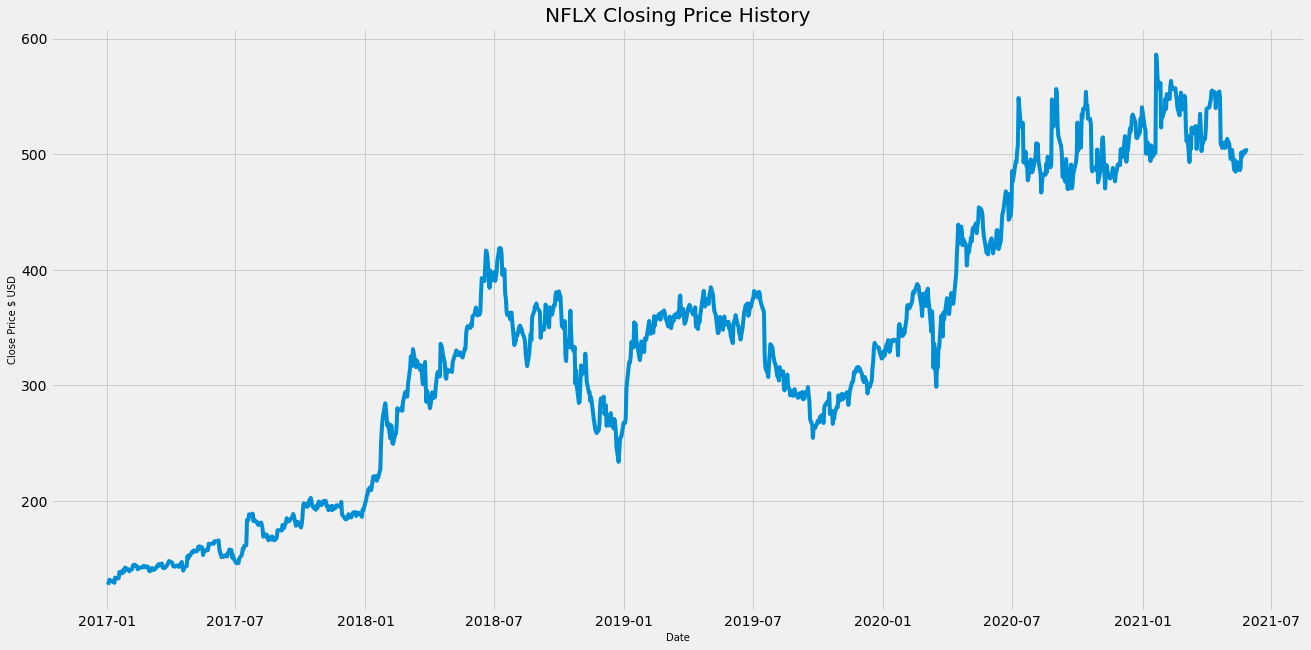

In [ ]:
# Visualize the dataset
plt.figure(figsize = (20, 10))
plt.plot(nflx_df['Close'])
plt.title('NFLX Closing Price History')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price $ USD', fontsize = 10)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
df = nflx_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = df.values

# Get the number of rows to train the model, 80% of the dataset
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

888

In [ ]:
# Scalling the dataset
# The scale will be in range between 0 to 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00418439],
       [0.00941484],
       ...,
       [0.81697715],
       [0.82024619],
       [0.81795789]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
# x_train is independent variable, y_train is dependent variable
x_train = []
y_train = []

# First pass through x_train will contain 60 datas indexed from position 0 to 59
# Then y_train for the pass through will contain the 61st data indexed in position 60
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print()
    print(y_train)


[array([0.        , 0.00418439, 0.00941484, 0.00780213, 0.00754059,
       0.00523047, 0.00655988, 0.00368311, 0.01353383, 0.01176855,
       0.01257491, 0.02379864, 0.02421272, 0.02157568, 0.02750355,
       0.02621773, 0.02499729, 0.03260324, 0.02992264, 0.02881118,
       0.02896371, 0.02552032, 0.02780865, 0.0293778 , 0.03598126,
       0.037594  , 0.03628637, 0.03776835, 0.03423776, 0.02905091,
       0.03221097, 0.03164432, 0.032102  , 0.03293017, 0.03567615,
       0.03332244, 0.03434674, 0.03469544, 0.03190586, 0.03303911,
       0.02623951, 0.02538956, 0.03149178, 0.03038029, 0.02796123,
       0.02841887, 0.02920344, 0.03493518, 0.03421598, 0.03870546,
       0.03683121, 0.03840035, 0.0399695 , 0.03253787, 0.03303911,
       0.03127383, 0.03166613, 0.03611202, 0.03853111, 0.04136428])]

[0.04482946146919903]
[array([0.        , 0.00418439, 0.00941484, 0.00780213, 0.00754059,
       0.00523047, 0.00655988, 0.00368311, 0.01353383, 0.01176855,
       0.01257491, 0.02379864, 0.02

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the dataset
# LSTM network expect the input to be 3-dimensional
# shape : number of samples, number of time steps, number of features 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(828, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the LSTM model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Train the LSTM model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

828/828 [==============================] - 37s 23ms/step - loss: 0.0085


In [ ]:
# Create testing dataset
# Create new array containing scaled values from index 828 to 1109
test_data = scaled_data[training_data_len - 60:, :]

# Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the dataset
# LSTM network expect the input to be 3-dimensional
# shape : number of samples, number of time steps, number of features 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model predicted closing price values
# We want to predictions contain these same values as our y_test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Getting the Root Mean Squared Error (RMSE) to evaluate the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

27.35681608036093

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


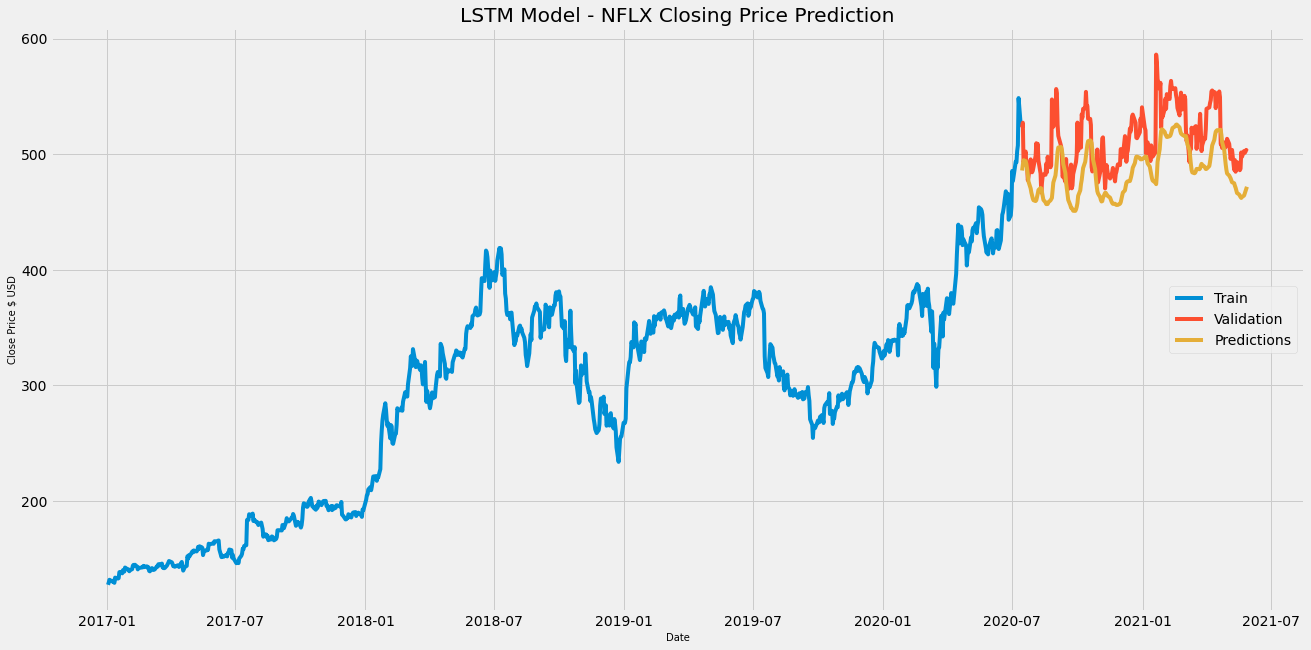

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Visualize the prediction
plt.figure(figsize = (20,10))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('LSTM Model - NFLX Closing Price Prediction')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price $ USD', fontsize = 10)
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'right')
plt.show()

In [ ]:
# Show the valid and predicted price
valid

,Close,Predictions
Date,,
2020-07-15,523.260010,486.022827
2020-07-16,527.390015,491.072662
2020-07-17,492.989990,494.957123
2020-07-20,502.410004,494.142426
2020-07-21,490.100006,491.863831
...,...,...
2021-05-24,502.899994,464.374207
2021-05-25,501.339996,466.312683
2021-05-26,502.359985,468.265564


In [ ]:
# Predict today price
# Get the dataset
nflx_today = web.DataReader('NFLX', data_source = 'yahoo', start = '2017-01-01', 
                         end = '2021-05-31')

# Create new dataframe
new_df = nflx_today.filter(['Close'])

# Get the last 60 day closing price values and convert to dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to numpy array
X_test = np.array(X_test)

# Reshape the X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[473.4095]]


In [ ]:
# today price
# Get the dataset
nflx_today2 = web.DataReader('NFLX', data_source = 'yahoo', start = '2021-05-28', 
                         end = '2021-05-28')
print(nflx_today2['Close'])

Date
2021-05-28    502.809998
2021-05-28    502.809998
Name: Close, dtype: float64
